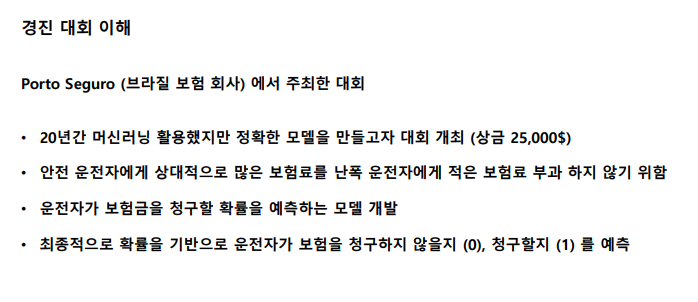

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

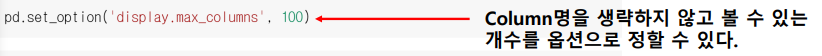

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
train.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,497115,1,1,5,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.7,0.5,-1.000000,8,1,-1,8,1,11,1,1,0,1,71,2,0.529150,1.534486,0.494975,3.605551,0.3,0.1,0.3,3,2,9,4,10,1,5,5,1,1,7,1,1,0,0,0,0,0
1,175191,6,2,4,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.9,0.5,1.084262,11,1,1,0,1,11,1,1,2,1,104,3,0.447214,0.866979,0.358190,3.316625,0.8,0.8,0.8,3,0,7,4,6,3,4,4,5,2,8,0,1,0,1,0,0,0
2,1270978,2,1,5,1,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.3,0.2,-1.000000,4,0,-1,0,1,15,1,1,0,1,5,2,0.424264,0.992378,0.400000,3.162278,0.9,0.2,0.0,3,2,9,2,9,0,10,9,2,4,10,0,1,0,0,1,0,0
3,365430,3,2,2,0,0,0,0,0,1,0,0,0,0,0,11,1,0,0,0.9,0.3,0.714580,7,1,-1,0,-1,11,0,1,2,1,7,3,0.424264,0.736644,0.412916,2.828427,0.4,0.0,0.9,3,2,8,1,7,2,10,5,2,0,3,1,1,1,0,0,1,0
4,120982,2,2,1,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.2,0.3,-1.000000,8,1,-1,0,1,1,1,1,0,1,65,1,0.316228,0.620084,0.350714,3.162278,0.6,0.5,0.3,0,1,7,2,8,2,8,5,1,3,9,0,0,0,0,0,1,0


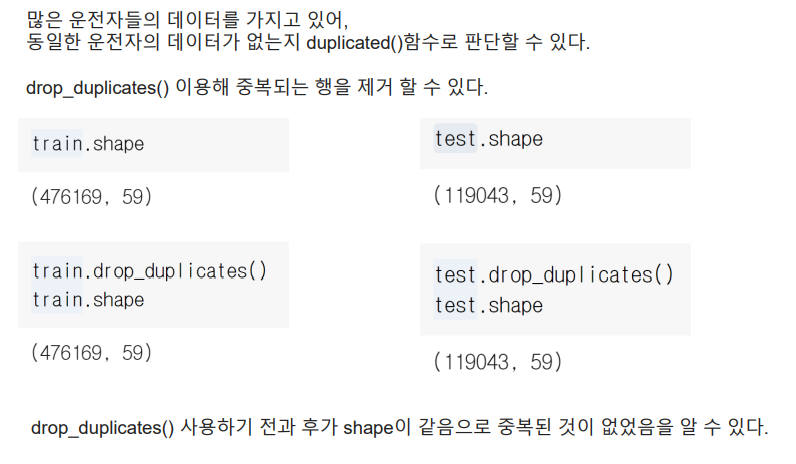

In [7]:
train.shape

(476169, 59)

In [8]:
test.shape

(119043, 59)

In [9]:
train.drop_duplicates()
train.shape

(476169, 59)

In [10]:
test.drop_duplicates()
test.shape

(119043, 59)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476169 entries, 0 to 476168
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              476169 non-null  int64  
 1   ps_ind_01       476169 non-null  int64  
 2   ps_ind_02_cat   476169 non-null  int64  
 3   ps_ind_03       476169 non-null  int64  
 4   ps_ind_04_cat   476169 non-null  int64  
 5   ps_ind_05_cat   476169 non-null  int64  
 6   ps_ind_06_bin   476169 non-null  int64  
 7   ps_ind_07_bin   476169 non-null  int64  
 8   ps_ind_08_bin   476169 non-null  int64  
 9   ps_ind_09_bin   476169 non-null  int64  
 10  ps_ind_10_bin   476169 non-null  int64  
 11  ps_ind_11_bin   476169 non-null  int64  
 12  ps_ind_12_bin   476169 non-null  int64  
 13  ps_ind_13_bin   476169 non-null  int64  
 14  ps_ind_14       476169 non-null  int64  
 15  ps_ind_15       476169 non-null  int64  
 16  ps_ind_16_bin   476169 non-null  int64  
 17  ps_ind_17_

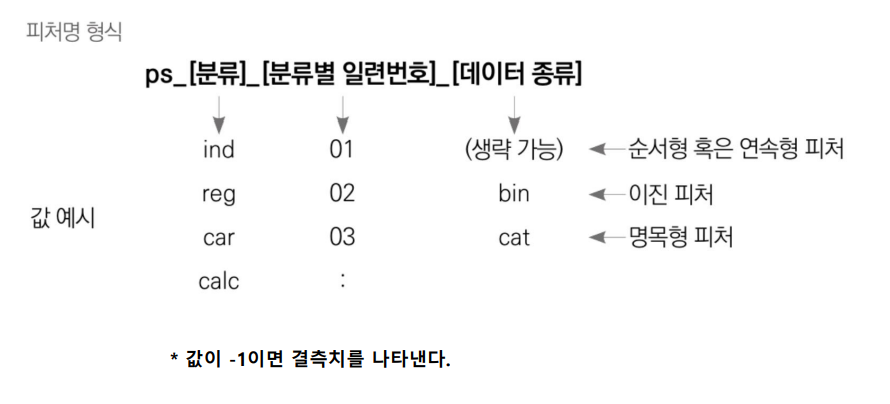

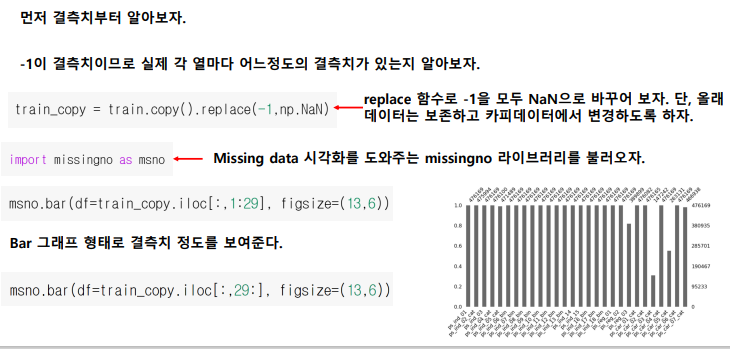

In [12]:
train_copy = train.copy().replace(-1, np.NaN)

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [14]:
import missingno as msno

<AxesSubplot:>

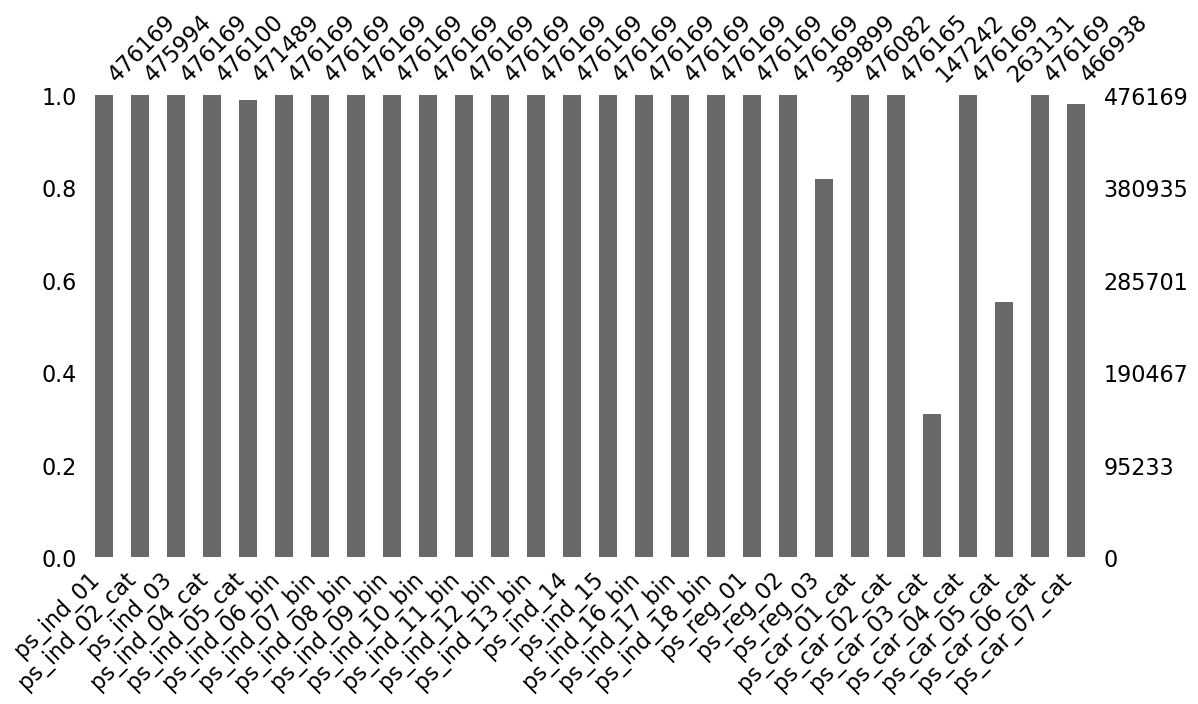

In [15]:
msno.bar(df = train_copy.iloc[:, 1:29], figsize = (13,6))

<AxesSubplot:>

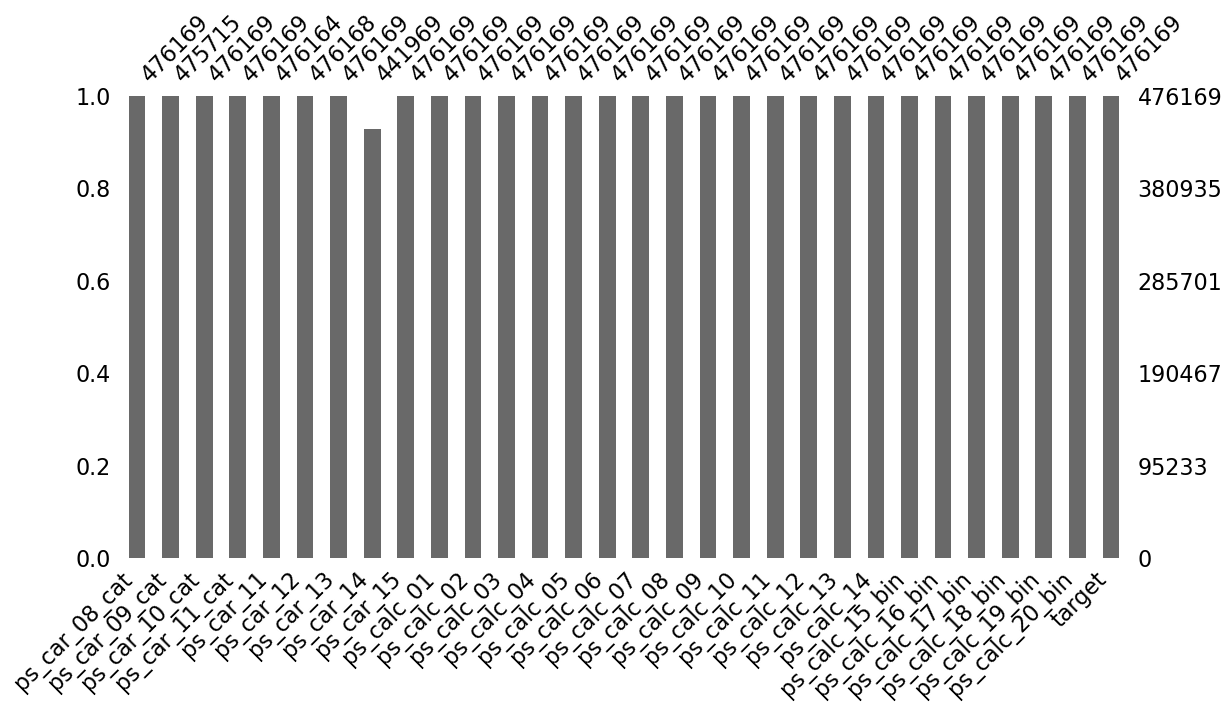

In [16]:
msno.bar(df = train_copy.iloc[:, 29:], figsize = (13,6))

<AxesSubplot:>

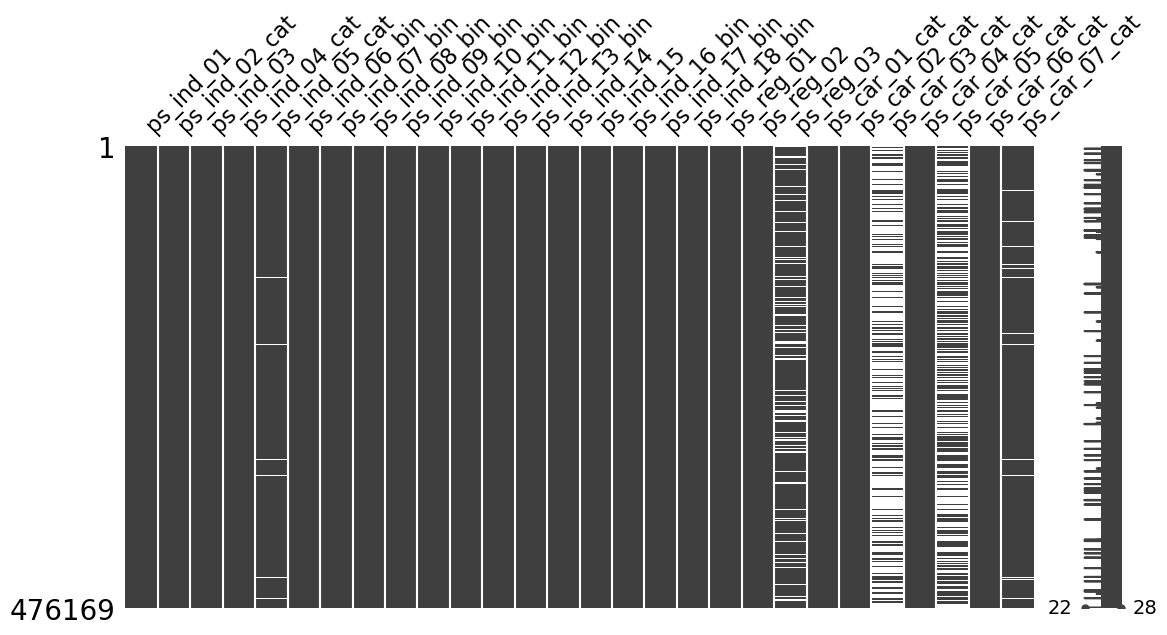

In [17]:
msno.matrix(df = train_copy.iloc[:, 1:29], figsize = (13,6))

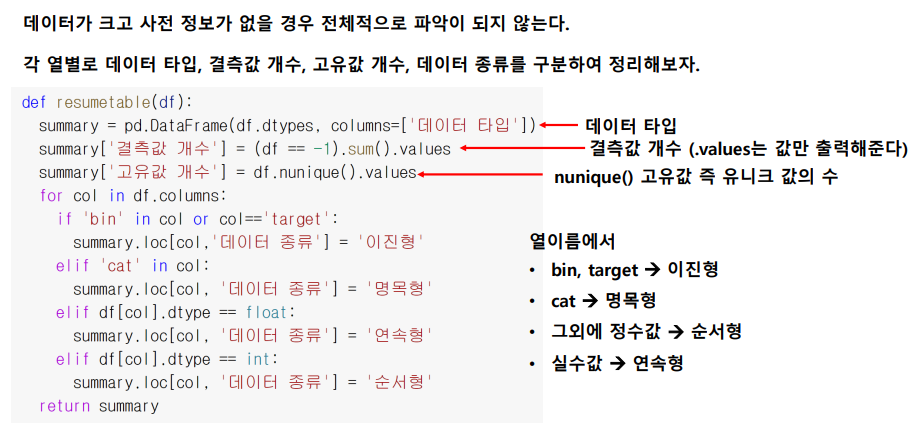

In [43]:
def resumetable(df): 
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values
    summary['고유값 개수'] = df.nunique().values
    for col in df.columns:
        if 'bin' in col or col =='target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
    return summary

In [44]:
summary = resumetable(train)

In [45]:
summary

,데이터 타입,결측값 개수,고유값 개수,데이터 종류
id,int64,0,476169,NaN
ps_ind_01,int64,0,8,NaN
ps_ind_02_cat,int64,175,5,명목형
ps_ind_03,int64,0,12,NaN
ps_ind_04_cat,int64,69,3,명목형
ps_ind_05_cat,int64,4680,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


Text(0.5, 1.0, 'Target Distribution')

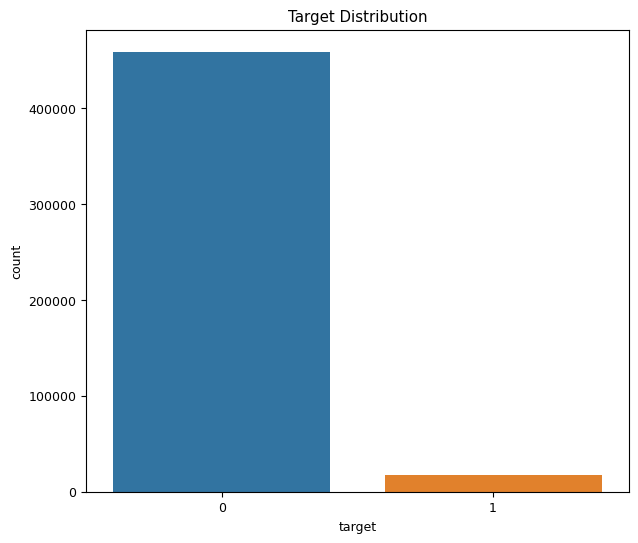

In [46]:
plt.figure(figsize = (7, 6))
ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

In [47]:
import matplotlib as mpl

Text(0.5, 1.0, 'Target Distribution')

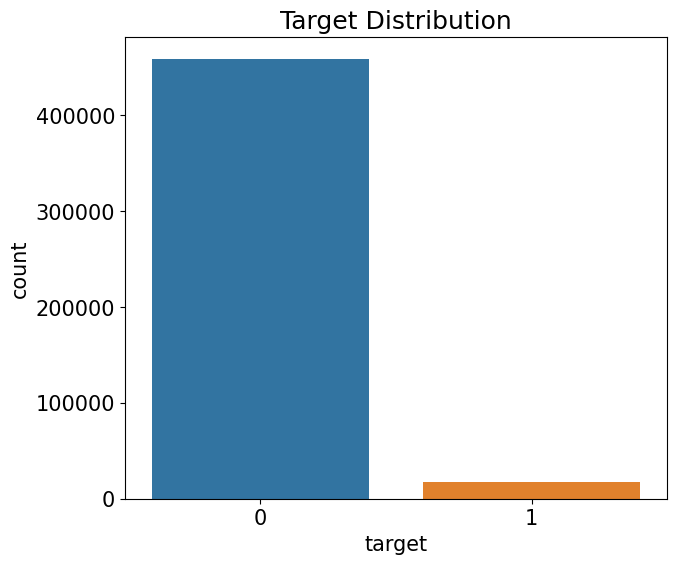

In [48]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))
ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

In [49]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord + width/2.0,
               height + total_size*0.001,
               '{0:0.1f}%'.format(percent),
               ha = 'center')

Text(0.5, 1.0, 'Target Distribution')

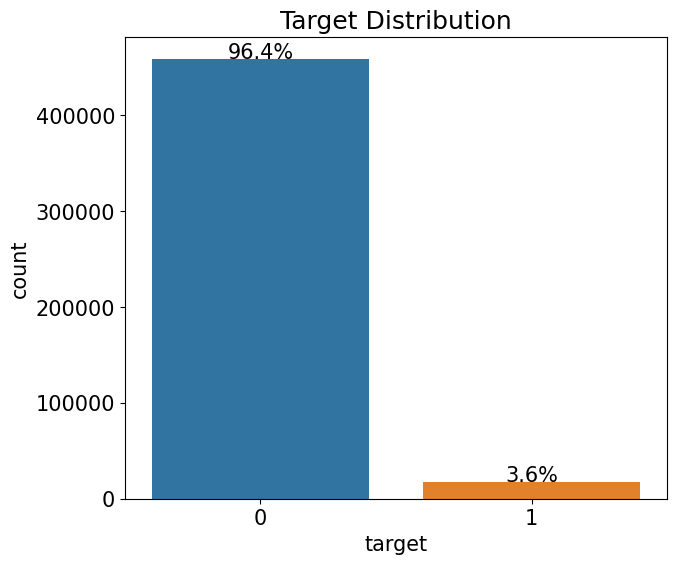

In [50]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))
ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

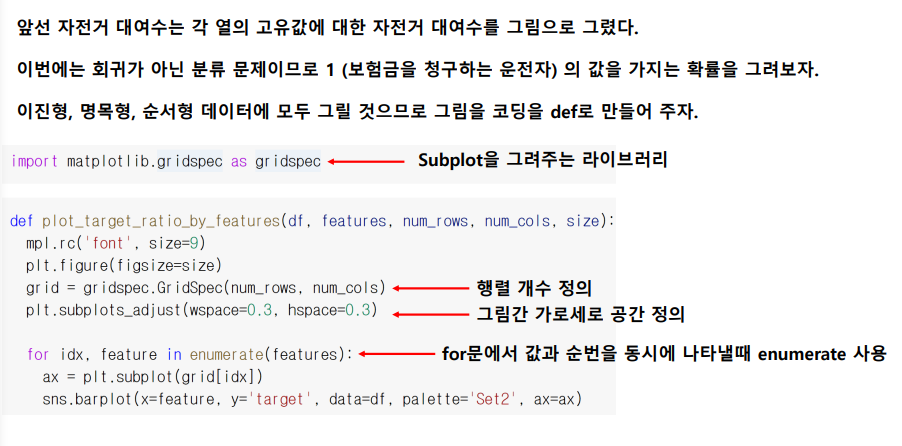

In [51]:
import matplotlib.gridspec as gridspec

In [52]:
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size):
    mpl.rc('font', size = 9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

In [53]:
bin_features = summary[summary['데이터 종류']=='이진형'].index

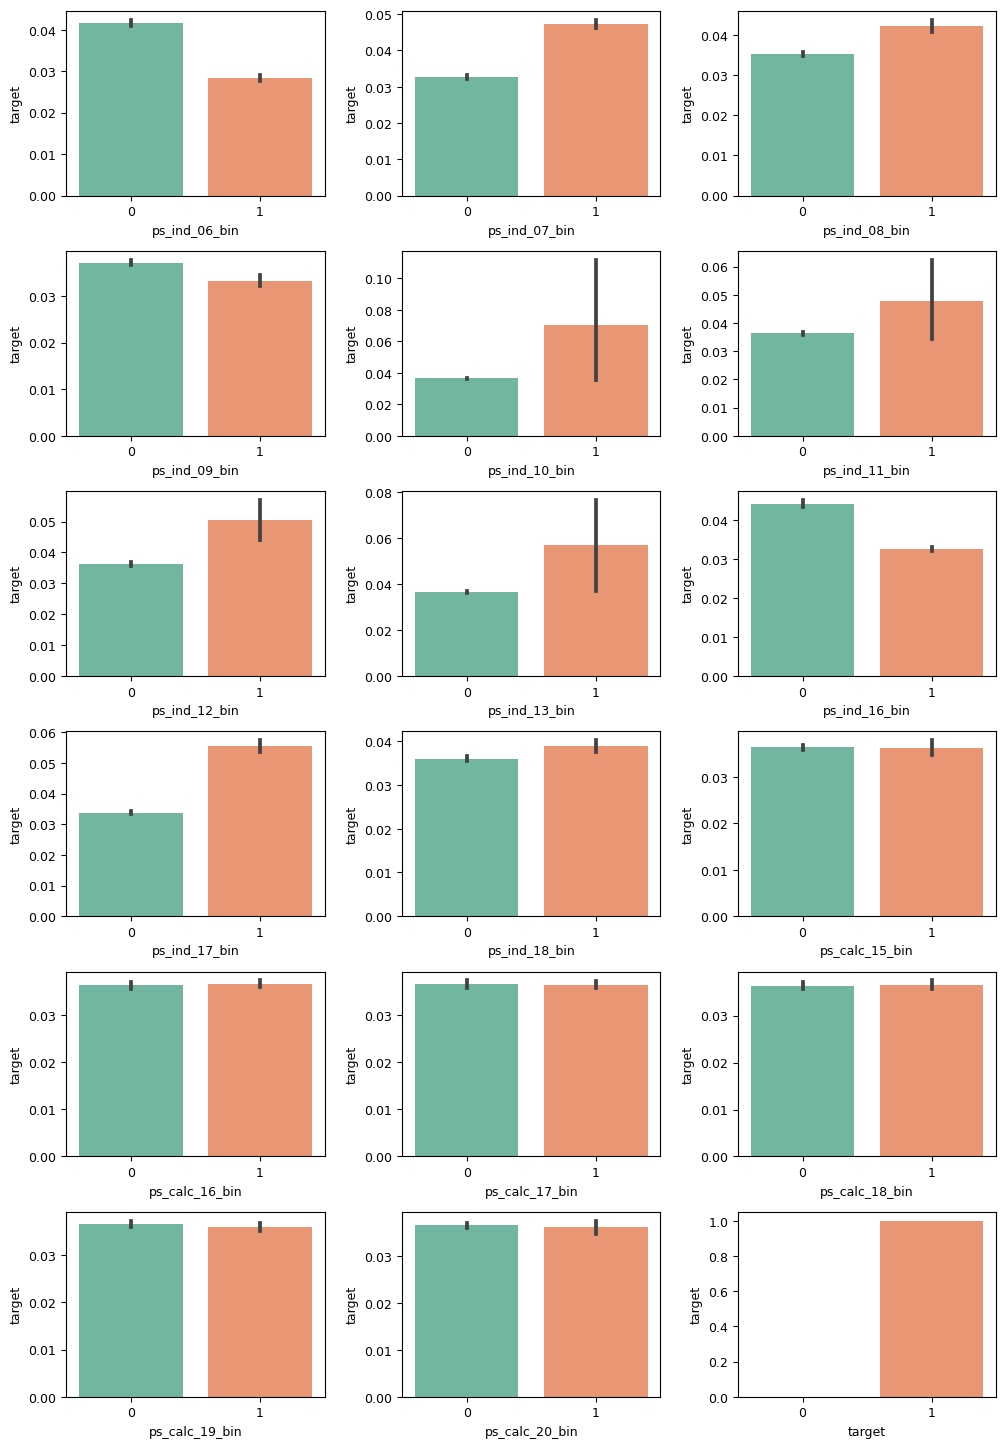

In [29]:
plot_target_ratio_by_features(train, bin_features, 6, 3, (12,18))

In [54]:
nom_features = summary[summary['데이터 종류']=='명목형'].index

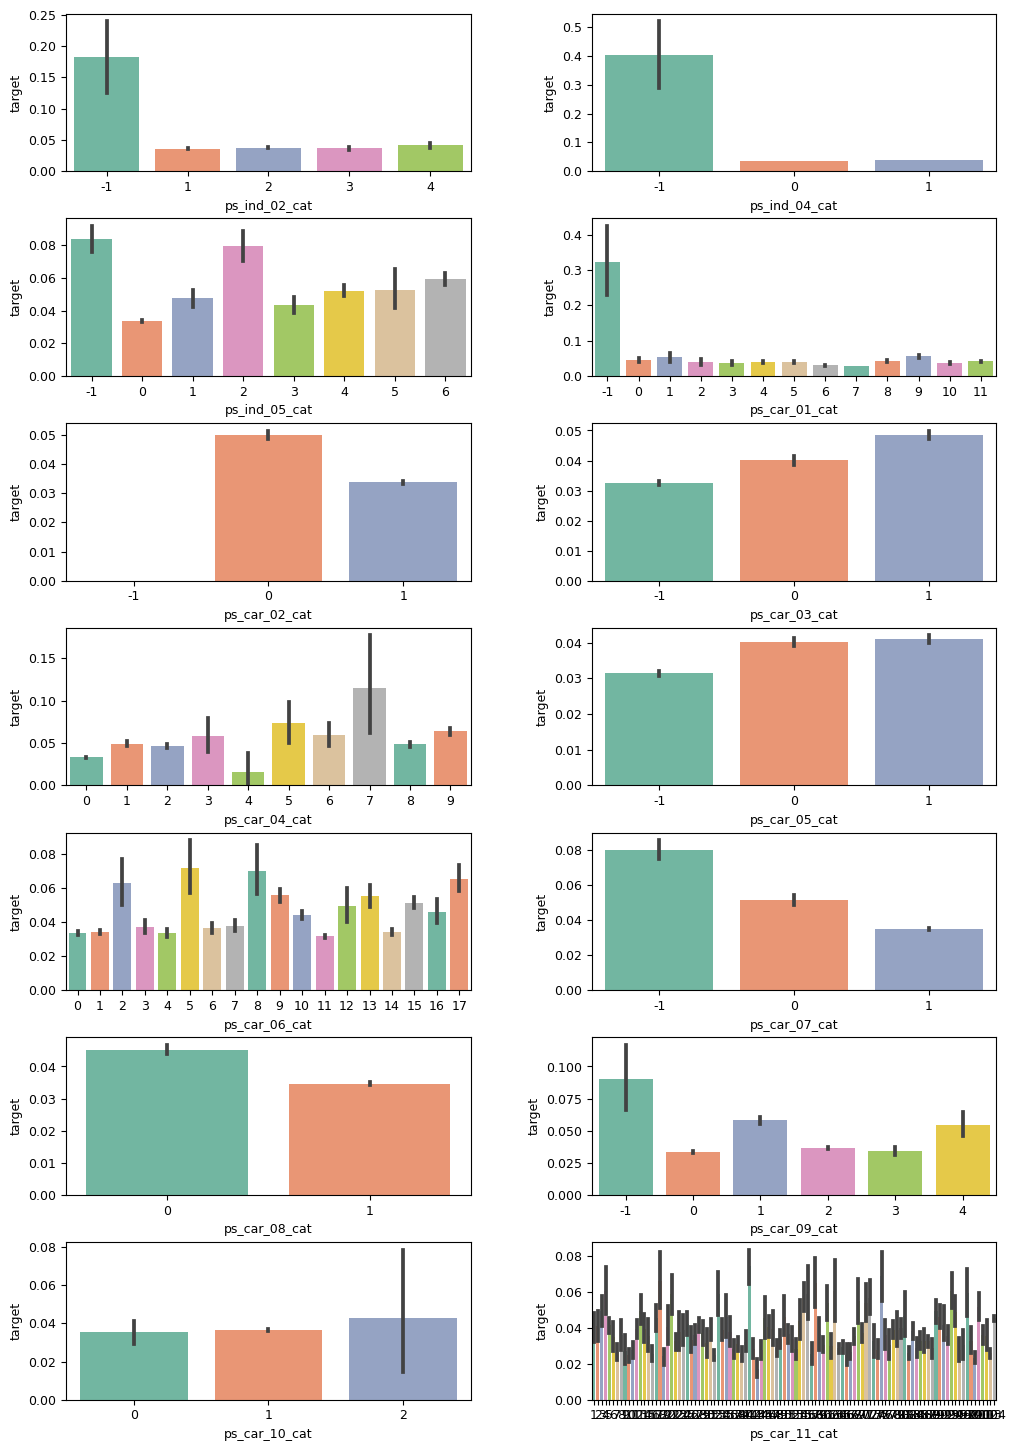

In [37]:
plot_target_ratio_by_features(train, nom_features, 7, 2, (12,18))

In [55]:
ord_features = summary[summary['데이터 종류']=='순서형'].index

In [58]:
plot_target_ratio_by_features(train,ord_features,6,3,(12,20))

<Figure size 1200x2000 with 0 Axes>

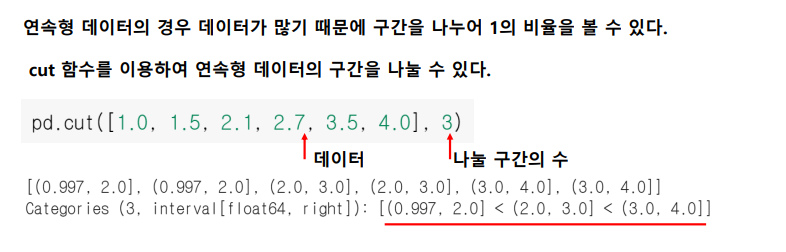

In [32]:
pd.cut([1.0,1.5,2.1,2.7,3.5,4.0],3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

In [33]:
cont_features = summary[summary['데이터 종류']=='연속형'].index

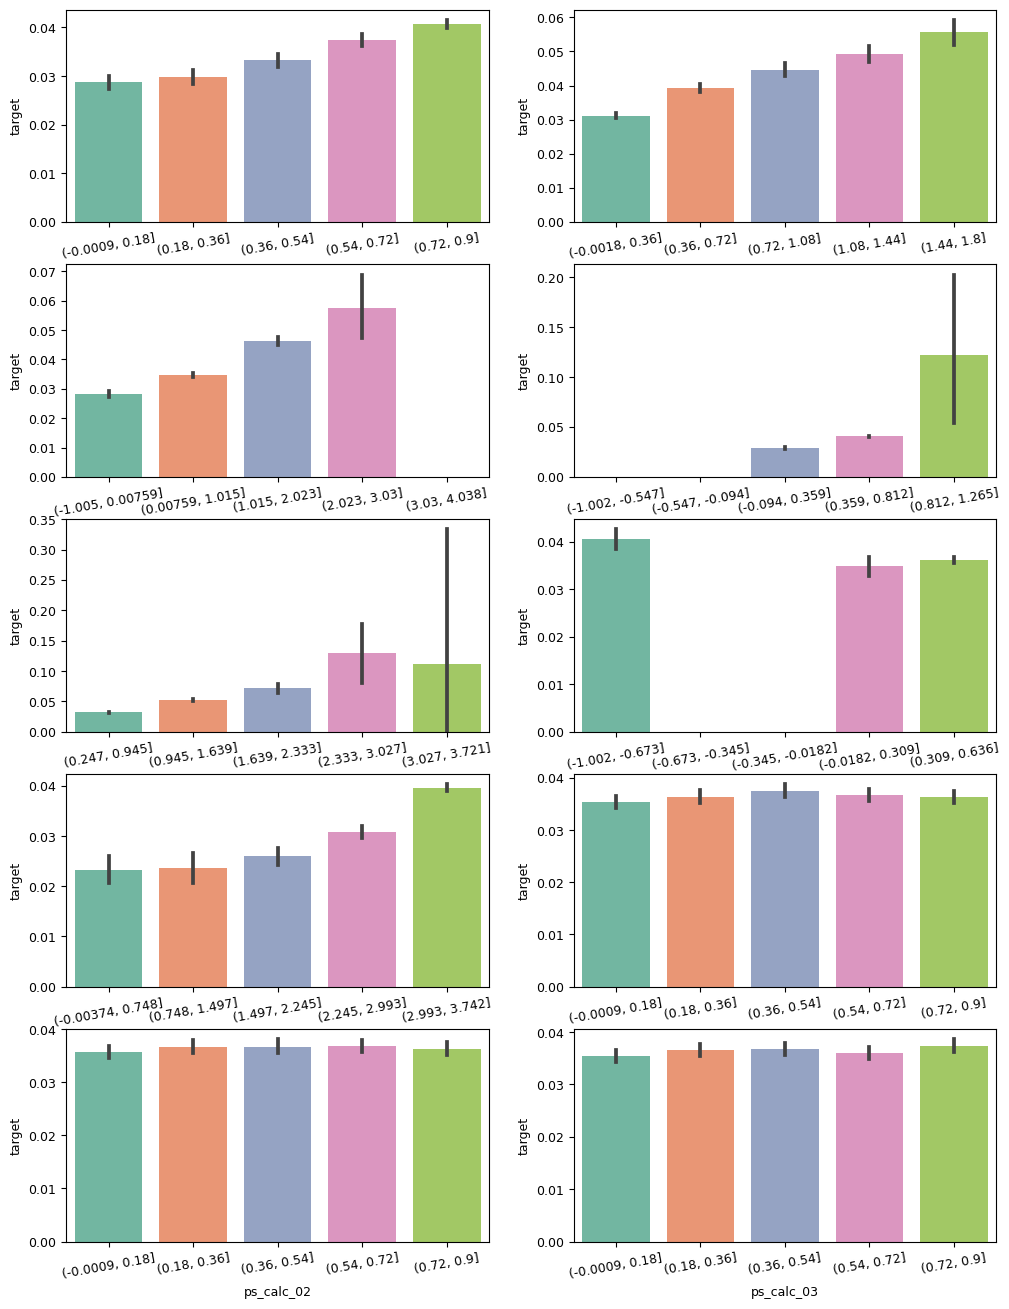

In [34]:
plt.figure(figsize=(12,16))
grid = gridspec.GridSpec(5,2)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5)
    
    ax = plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y='target', data = train, palette = 'Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10)

In [35]:
train_copy = train_copy.dropna()

<AxesSubplot:>

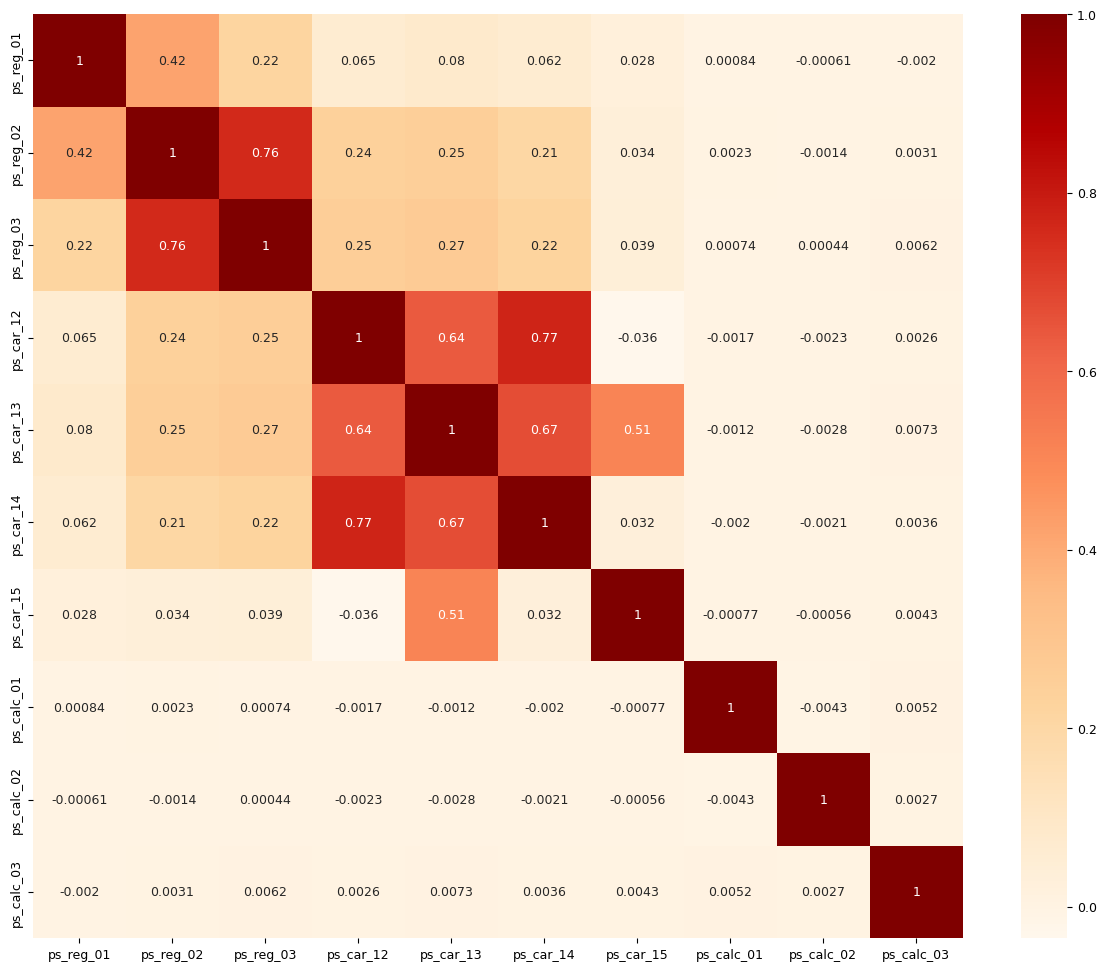

In [36]:
plt.figure(figsize = (15, 12))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot = True, cmap = 'OrRd')